1. Given the money spent on TV,radio and newspaper.find out which media has influenced sales more using Lasso Regression model 

In [1]:
# feature selection using lasso Regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import Lasso

In [3]:
# load the dataset 
df  = pd.read_csv('/Users/hackthebox/Downloads/Machine-Learning-Self-Study/Regression/Lasso_Regression/Data/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# see the names of columns
names = df.columns
names

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
# to rename the column and drop the column
df.rename({'Unnamed: 0':'a'}, axis='columns',inplace=True)

In [7]:
# drop the column
df.drop(['a'], axis=1, inplace=True)

In [8]:
# drop sales column and take remainig columns as x
x = df.drop('sales', axis=1)

In [9]:
# take sales column to y
y = df['sales'].values

In [10]:
# take the names of oth to 13th columns
names = x.columns
names

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [11]:
# range of columns,the gives 0 to 3
rng = range(len(names))
rng

range(0, 3)

In [22]:
# apply the lasso regression on the data
# after the model is trained , find the co-efficients
# train the model,we have ti call fit() method on the data.
ls = Lasso(alpha=0.01)
data= ls.fit(x,y)
cf = data.coef_
print(cf)

[ 0.0457633   0.1884668  -0.00100074]


- 2nd is the highest value -radio

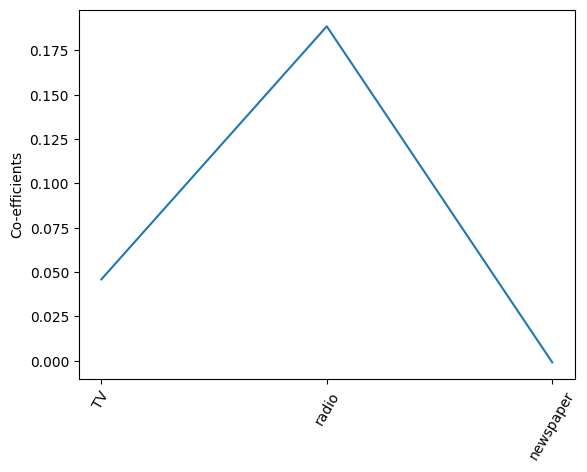

In [14]:
# draw line plot between the column numbers and co-efficients
plt.plot(rng,cf)
plt.xticks(rng,names,rotation=60)
plt.ylabel('Co-efficients')
plt.show()

In [23]:
# finds the accuracy of the model
ls.score(x,y)

0.8972106012924924

- find the sales if the company is spending dollars 150 on TV,41 on radio and 60 on newspaper

In [24]:
newdata = [[150,41,60]]
sales = ls.predict(newdata)
print(sales)

[17.4710243]
